# Unicorn Companies Analysis

## Introduction

In this notebook, I will analyze data on unicorn companies—private startups valued at over $1 billion—to uncover trends in industry growth, geographic distribution, and investment patterns. The dataset includes over 1,000 unicorn companies, detailing their industry, country, year founded, and major investors. My goal is to explore key characteristics of these companies and provide actionable insights.

## Overview

To achieve this, I will perform various analyses, including:

- Cleaning and structuring the dataset, addressing missing values, and ensuring data integrity.  
- Aggregating company valuations by country and industry to identify major investment hubs.  
- Performing datetime transformations to analyze company growth over time.  
- Visualizing trends in unicorn emergence by industry and geography using bar charts, heatmaps, and maps.  
- Identifying the most common investors and their preferred industries.  
- Creating global valuation maps, with a focus on companies that became unicorns after 2020.  
- Filtering data to identify high-growth industries and key investment regions.  

By conducting these analyses, I aim to provide a data-driven perspective on the unicorn ecosystem, helping investors and analysts make informed decisions about future opportunities.


## Dataset Structure

### Unicorn Companies Dataset  
This dataset contains information about unicorn companies—privately held startups valued at over $1 billion. It includes key details about each company, such as its industry, geographic location, valuation, funding, and major investors. Below is a description of the key fields in this dataset:

- **Company**: The name of the unicorn company.  
- **Valuation**: The company's valuation in billions of dollars.  
- **Date Joined**: The date the company reached unicorn status.  
- **Industry**: The sector in which the company operates.  
- **City**: The city where the company is headquartered.  
- **Country/Region**: The country where the company is based.  
- **Continent**: The continent where the company operates.  
- **Year Founded**: The year the company was established.  
- **Funding**: The total funding received by the company.  
- **Select Investors**: The major investment firms backing the company.  

This dataset provides insights into industry trends, geographic distribution, and investment patterns among unicorn companies worldwide.


## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

# Exploring the Dataset: Structure, Trends, and Key Insights

## Introduction
In this section, I will use Python libraries like pandas, numpy, seaborn, and matplotlib.pyplot to analyze a dataset of unicorn companies. My objective is to help an investment firm decide which industries and companies to focus on by identifying significant trends in how and when companies reach unicorn status. This dataset includes information on over 1,000 unicorn companies, including their valuation and key investors.

This analysis involves exploratory data analysis (EDA), a critical step in understanding patterns and structuring data for deeper insights. By visualizing and interpreting trends, I aim to provide actionable recommendations for the firm's investment strategy.

In [2]:
companies = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Unicorn-Companies-Analysis\Data\Unicorn companies.csv")

### Exploring the Dataset
#### Displaying the First 10 Rows
The first 10 rows provide an initial understanding of the dataset's structure.

In [3]:
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


Understanding Columns

The "Date Joined" column represents the date when a company achieved unicorn status.

The "Select Investors" column represents key investors who have invested in these companies.

#### Assessing Dataset Size

The size property reveals the total number of values in the dataset.

In [4]:
companies.size

10740

The dataset contains 10,740 values across all columns.

#### Determining Dataset Shape

Using the `.shape` property, I identified the number of rows and columns.

In [5]:
companies.shape

(1074, 10)

The dataset consists of 1,074 rows (unicorn companies) and 10 columns (company attributes).

#### Checking Data Types

I used .info() to examine the data types of each column.

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


**Observations:**

The "Year Founded" column is stored as int64, allowing for numerical calculations and trend analysis.

The "Date Joined" column is stored as an object, indicating that it needs conversion to datetime format for better analysis.

### Statistical Analysis

To generate descriptive statistics for numerical columns, I used .describe().

In [7]:
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


Key Findings:

The earliest founded company in the dataset dates back to 1919.

The most recent founded company in the dataset is from 2021.

### Data Cleaning and Transformation

#### Converting "Date Joined" to Datetime Format

Since the "Date Joined" column is stored as a string, I converted it to datetime format for better analysis.

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [9]:
companies['Date Joined']=pd.to_datetime(companies['Date Joined'])

In [10]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


#### Extracting "Year Joined"

For better comparison, I extracted the year component from "Date Joined" and stored it in a new column called "Year Joined".

In [11]:
companies['Year Joined'] = companies['Date Joined'].dt.year

In [12]:
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


### Results and Evaluation

### Take a Sample of the Data

It is not necessary to take a sample of the data in order to conduct the visualizations and EDA that follow. However, in certain scenarios, sampling is useful due to time and resource limitations. To develop skills in sampling, a sample of the data was taken for the next steps of analysis using the sample() function.

In [13]:
companies_sampled=companies.sample(n=50,random_state=42)

### Visualize the Time It Took Companies to Reach Unicorn Status

A bar plot was created to visualize the longest time it took companies to reach unicorn status for each industry represented in the sample. The data was prepared by calculating the difference between the Year Joined and Year Founded columns.

In [14]:
# Prepare data for plotting
companies_sampled["years_until_unicorn"]=companies_sampled["Year Joined"]-companies_sampled["Year Founded"]

companies_sampled.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_until_unicorn
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5


In [15]:
companies_sampled["Year Joined"].value_counts()

Year Joined
2021    26
2020     8
2019     5
2018     3
2017     3
2022     3
2016     1
2015     1
Name: count, dtype: int64

In [16]:
grouped=companies_sampled[["Industry","years_until_unicorn"]].groupby("Industry").max().sort_values("years_until_unicorn")

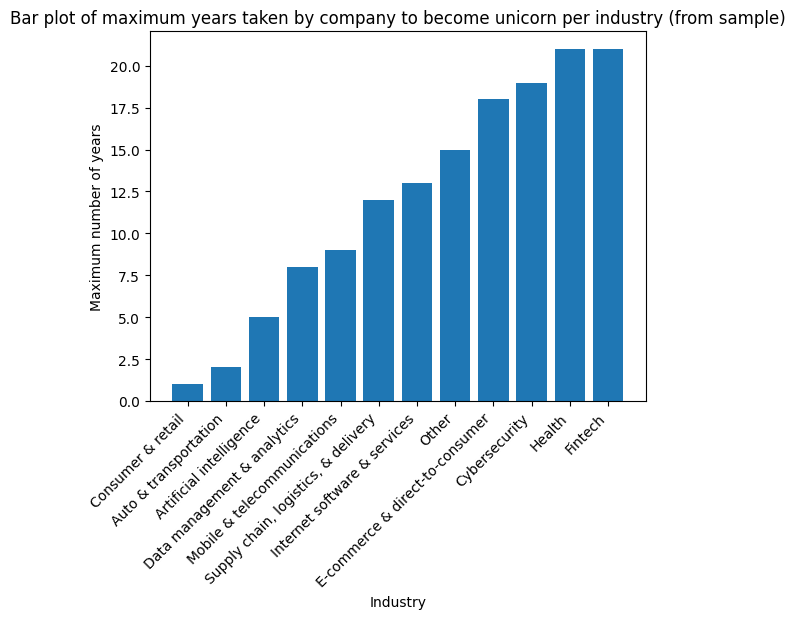

In [17]:
plt.bar(x=grouped.index,height=grouped["years_until_unicorn"],label="Years taken to reach unicorn")

plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum number of years")
plt.xticks(rotation=45,horizontalalignment='right')

plt.show()

**Observations:**

The industries that took the longest to reach unicorn status are Fintech and Health, both taking 21 years.

Cybersecurity took 19 years, while E-commerce & Direct-to-Consumer took 18 years.

The fastest industry to reach unicorn status was Consumer & Retail.

#### Visualize the Maximum Unicorn Company Valuation per Industry

A bar plot was created to visualize unicorn companies' maximum valuation per industry in the sample. First, a new column was created to represent the valuation as a numerical value.

In [18]:
companies_sampled['valuation_billions'] = companies_sampled['Valuation'].str.replace("$", "").str.replace("B", "").astype('int')

companies_sampled.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_until_unicorn,valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3


In [19]:
grouped1 = companies_sampled[["Industry", "valuation_billions"]].groupby("Industry").sum().sort_values(by="valuation_billions")

plt.show()

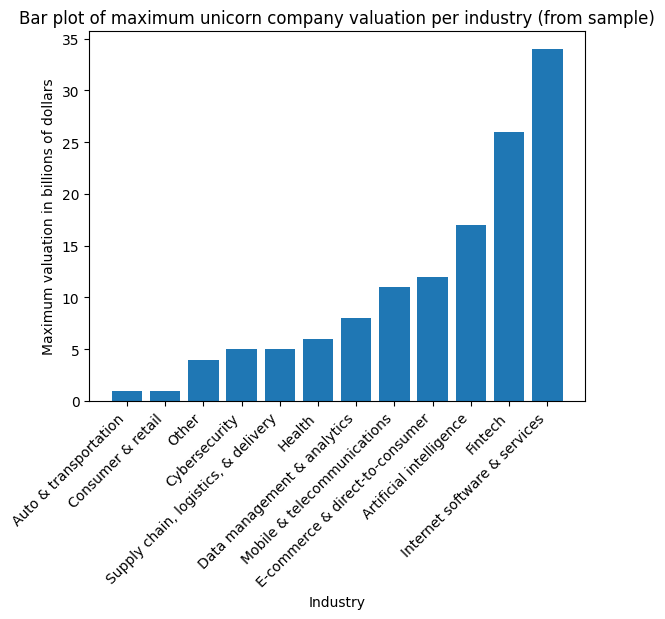

In [20]:
plt.bar(x=grouped1.index, height=grouped1['valuation_billions'], label="Valuation in billions")

plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

**Observations:**

The highest valuation is in the Internet Software & Services industry, valued at 34 billion dollars.

Fintech follows at 26 billion dollars, with Artificial Intelligence at 17 billion dollars.

The industries with the lowest valuations are Auto & Transportation and Consumer & Retail, both at 1 billion dollars.

## Key Takeaways

- Visualizations and data grouping help in understanding dataset structures and industry trends.
- Pandas functions like `info()`, `shape()`, `sample()`, and `describe()` assist in inspecting and summarizing data.
- `matplotlib.pyplot` bar plots effectively compare industry trends.
- The dataset consists of 1,074 unicorn companies.
- Fintech and Health industries took longer to reach unicorn status but have high valuations.
- The Internet Software & Services industry has the highest unicorn valuation at 34 billion dollars.

# Structuring Data for Effective Analysis

In this section, I will conduct an exploratory data analysis (EDA) on a dataset of unicorn companies using Python libraries such as pandas, numpy, seaborn, and matplotlib. The goal is to assist an investment firm in identifying key trends and patterns among companies valued at over one billion dollars. By structuring and analyzing the data, I aim to uncover insights that can guide investment decisions.

This analysis involves working with datetime transformations to better understand when companies achieve unicorn status, along with other relevant characteristics. Through visualization and data structuring, I will highlight industry trends, investment patterns, and other factors that contribute to a company's rapid growth.

### Exploring the Data
#### Checking for Duplicates

I checked for duplicate records:

In [21]:
companies.drop_duplicates().shape

(1074, 11)

Since the shape remained unchanged, there were no duplicate values in the dataset.

#### Examining Data Types

To better understand the nature of the dataset, I examined the data types of each column:

In [22]:
companies.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
Year Joined                  int32
dtype: object

- The Year Founded column was of type int64.

- The remaining 9 columns were of type object.

#### Sorting the Data by Year Founded

Sorting the dataset helped analyze company foundation trends:

In [43]:
companies.sort_values(by="Year Founded", ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Join
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",2017,October,-4
782,Phantom,$1B,2022-01-31,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital",2022,January,1
775,Jokr,$1B,2021-12-02,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft",2021,December,0
554,ClickHouse,$2B,2021-10-28,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par...",2021,October,0
952,LayerZero Labs,$1B,2022-03-30,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa...",2022,March,1
967,Mensa Brands,$1B,2021-11-16,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa...",2021,November,0
396,candy.com,$2B,2021-10-21,Fintech,New York,United States,North America,2021,$100M,"Insight Partners, Softbank Group, Connect Vent...",2021,October,0
822,GlobalBees,$1B,2021-12-28,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca...",2021,December,0
314,Flink Food,$3B,2021-12-01,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures",2021,December,0
238,Yuga Labs,$4B,2022-03-22,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven...",2022,March,1


**Observations:**

- The most recent companies in the dataset were founded in 2021.

- The oldest company in the dataset was founded in 1919.

- Companies founded in earlier years took significantly longer to achieve unicorn status.

#### Counting Companies Founded Each Year

To determine the number of companies founded per year, I used:

In [23]:
companies["Year Founded"].value_counts().sort_values(ascending=False)

Year Founded
2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
2003      8
2004      8
1999      8
1998      5
2002      4
1995      2
1994      2
1991      1
1919      1
1996      1
1979      1
1992      1
1984      1
1990      1
1993      1
1997      1
Name: count, dtype: int64

**Observations:**

- 2015 had the highest number of companies founded.

- The top 3 years for company foundations were 2015, 2016, and 2014.

#### Visualizing Yearly Trends

To better observe trends, I plotted a histogram of the `Year` Founded column:

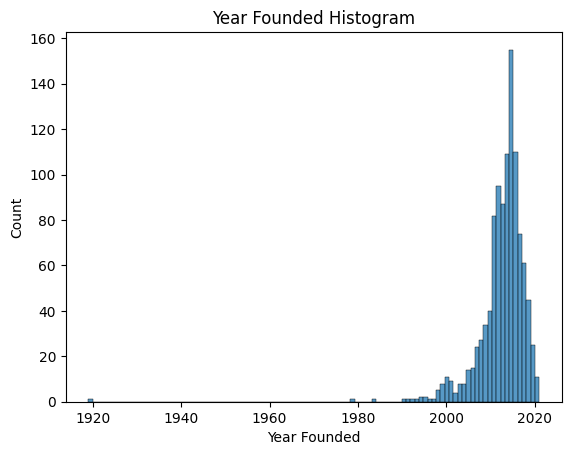

In [24]:
sns.histplot(data=companies, x='Year Founded')
plt.title('Year Founded Histogram');

For a clearer categorical representation, I used a bar plot:

In [44]:
year_counts = companies['Year Founded'].value_counts().reset_index()
year_counts.columns = ['Year Founded', 'Count']

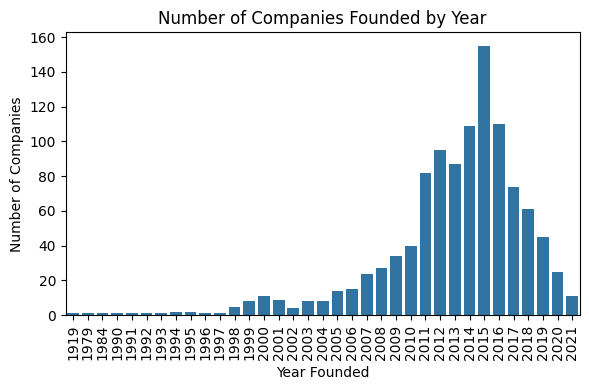

In [45]:

plt.figure(figsize=(6, 4))
sns.barplot(data=year_counts, x='Year Founded', y='Count')
plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')
plt.title('Number of Companies Founded by Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Transforming the Data
#### Converting `Date Joined` to Datetime Format

Since `Date Joined` was originally an object, I converted it into a datetime format for meaningful time-based analysis:

In [46]:
companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

Verifying the transformation:

In [47]:
companies.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
Year Joined                  int32
Month Joined                object
Years To Join                int64
dtype: object

#### Extracting the Month Name

To analyze seasonal trends in unicorn status attainment, I extracted the month from `Date Joined`:

In [48]:
companies["Month Joined"] = companies["Date Joined"].dt.month_name()

#### Calculating Years to Unicorn Status

I computed how many years each company took to reach unicorn status:

In [49]:
companies["Years To Join"] = companies["Date Joined"].dt.year - companies["Year Founded"]

### Focusing on 2021 Trends

Since 2021 was the most recent year in the dataset, I created a subset of companies that attained unicorn status in 2021:

In [50]:
companies_2021 = companies[companies["Date Joined"].dt.year == 2021]

#### Observing Weekly Trends in 2021

To analyze weekly patterns, I created a Week Joined column:

In [51]:
companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

Grouping by week to count the number of companies reaching unicorn status:

In [52]:
companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

Displaying the results:

In [53]:
companies_by_week_2021.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


### Comparing Trends Over Time

To analyze trends over time in the average valuation of companies that became unicorns, I structured the data accordingly. The analysis compares companies that joined unicorn status in 2021 with another year of interest, 2020.

#### Filter by the Additional Year

To begin, I created a subset containing companies that joined in 2020:

In [54]:
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

#### Concatenate the New Subset

Next, I concatenated the 2020 subset with the 2021 subset while dropping the "Week Joined" column from the latter:

In [55]:
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])

#### Add a Time Interval Column

I added a Quarter Joined column to categorize data points based on quarters:

In [56]:
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

#### Transform the Valuation Column

To ensure numerical consistency, I converted the `Valuation` column by removing `$` and `B` and casting values to `float`:

In [57]:
companies_2020_2021["Valuation"] = companies_2020_2021["Valuation"].str.strip("$B").astype(float)

#### Compute the Average Valuation Per Quarter

The dataset was then grouped by `Quarter Joined`, calculating the mean valuation:

In [58]:
companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation": "Average Valuation"})

#### Visualizing the Time-to-Unicorn Distribution

To analyze how long companies took to reach unicorn status with respect to their joining month, I created a box plot using Seaborn:

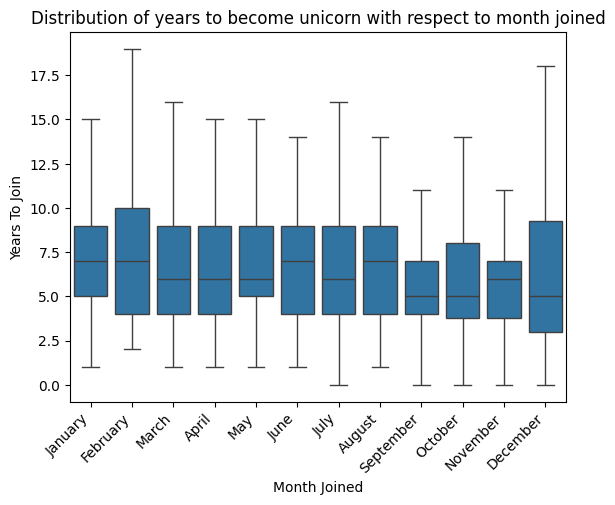

In [59]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

sns.boxplot(x=companies['Month Joined'],
            y=companies['Years To Join'],
            order=month_order,
            showfliers=False)

plt.title('Distribution of years to become unicorn with respect to month joined')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Observations:**

- Companies joining in September and October took less time to reach unicorn status.

- January, February, June, and August had similar median values.

- Trends varied across months but should be interpreted carefully due to variations in the number of companies per month.

### Results and Evaluation

#### Visualizing the Time to Unicorn Status by Founding Year

A bar plot was created to observe the average time companies took to reach unicorn status:

C:\Users\saswa\AppData\Local\Temp\ipykernel_4392\1225578166.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=companies["Year Founded"], y=companies["Years To Join"], ci=False)


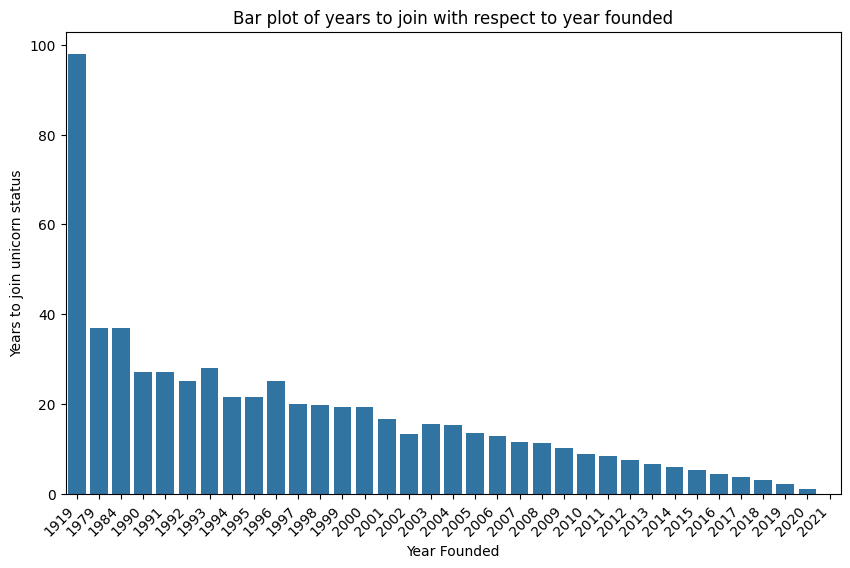

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x=companies["Year Founded"], y=companies["Years To Join"], ci=False)
plt.title("Bar plot of years to join with respect to year founded")
plt.ylabel("Years to join unicorn status")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

**Observations:**

- Companies founded later reached unicorn status faster.

- There is a negative correlation between the founding year and the time taken to become a unicorn.

#### Analyzing the Number of Companies Joining Per Interval

I created a bar plot to visualize the number of companies joining per week in 2021:

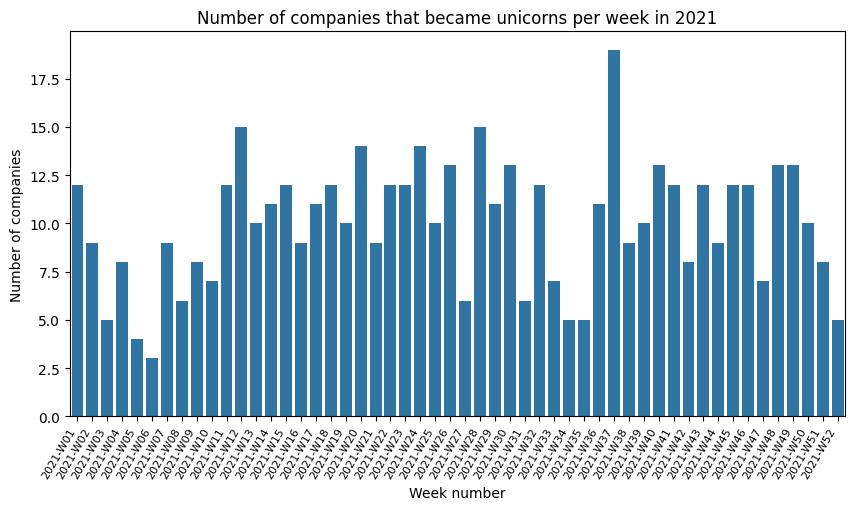

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(data=companies_by_week_2021, x='Week Joined', y='Company Count')
plt.xlabel("Week number")
plt.ylabel("Number of companies")
plt.title("Number of companies that became unicorns per week in 2021")
plt.xticks(rotation=60, horizontalalignment='right', fontsize=8)
plt.show()

**Observations:**

- The highest number of companies reached unicorn status in Week 37 (mid-September).

- Peaks also occurred in Week 12 (late March) and Week 28 (mid-July).

#### Analyzing the Average Valuation Over Quarters

A grouped bar plot was created to compare valuations across quarters:

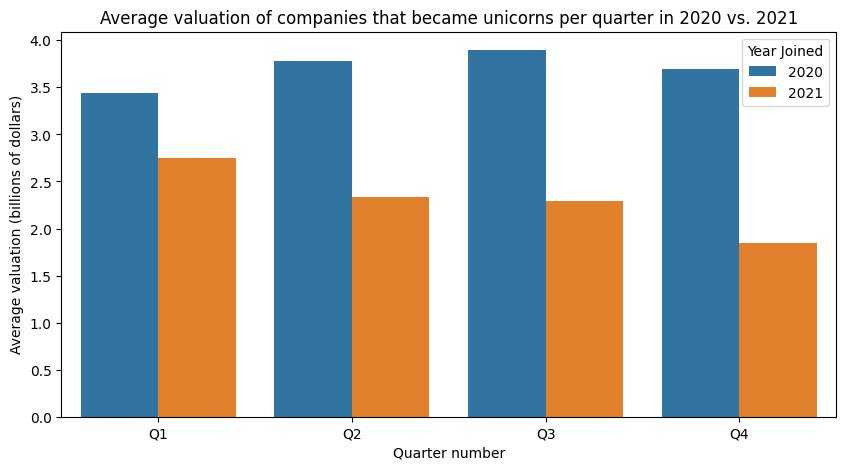

In [62]:
companies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]
companies_by_quarter_2020_2021['Year Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]

plt.figure(figsize = (10, 5))
sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year Joined'])
plt.xlabel("Quarter number")
plt.ylabel("Average valuation (billions of dollars)")
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")
plt.show()

**Observations:**

The average valuation was consistently higher in 2020 than in 2021.

The highest valuation in 2020 was in Q3, while in 2021, it was in Q1.

### Potential Bias in the Data

Geographical Bias: The dataset may not represent all regions equally.

Industry Bias: Some industries may be overrepresented, skewing results.

Time Gaps: Some periods might be underrepresented, affecting trends.

Bias from Recent Data: Companies founded later may seem to reach unicorn status faster due to less historical tracking.

## Key Takeaways

- pandas is essential for structuring and manipulating data efficiently.
- Converting dates into datetime format helps extract meaningful insights.
- Visualizations using matplotlib and seaborn provide powerful insights.
- Companies founded in later years tend to reach unicorn status faster.
- The number of companies reaching unicorn status is increasing over time.